# DS CA5

Written by Babak Hosseini Mohtasham 810101408, Parsa Ahmadi 810101609 and Mahdi Naeini 810101536

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import Pitch
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import log_loss

we can drop penalty kicks, olimpico goals, and free kicks.

In [61]:
dataset = pd.read_csv("football.csv")

In [62]:
dataset.head()

,matchId,playerId,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome
0,m_91,p_103,open play,right foot,13.47,-11.22,1,0,medium,70,9,goal
1,m_17,p_16,open play,left foot,9.48,14.22,3,0,medium,55,4,saved by keeper
2,m_111,p_88,free kick,left foot,29.43,-1.25,6,2,low,86,31,saved by keeper
3,m_142,p_87,open play,right foot,26.93,1.00,4,1,medium,77,2,missed chance
4,m_117,p_9,open play,right foot,10.72,5.24,2,0,medium,76,46,goal


In [63]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8925 entries, 0 to 8924
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   matchId                8925 non-null   object 
 1   playerId               8925 non-null   object 
 2   playType               8925 non-null   object 
 3   bodyPart               8925 non-null   object 
 4   x                      8925 non-null   float64
 5   y                      8925 non-null   float64
 6   interveningOpponents   8925 non-null   int64  
 7   interveningTeammates   8925 non-null   int64  
 8   interferenceOnShooter  8891 non-null   object 
 9   minute                 8925 non-null   int64  
 10  second                 8925 non-null   int64  
 11  outcome                8891 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 836.8+ KB


In [64]:
dataset.describe()

,x,y,interveningOpponents,interveningTeammates,minute,second
count,8925.000000,8925.000000,8925.000000,8925.000000,8925.000000,8925.000000
mean,14.564631,0.364408,2.531989,0.336471,48.541401,29.243810
std,7.841865,8.999063,1.386693,0.680175,26.397998,17.306565
min,0.000000,-33.920000,0.000000,0.000000,0.000000,0.000000
25%,8.480000,-5.740000,2.000000,0.000000,26.000000,14.000000
50%,12.470000,0.500000,2.000000,0.000000,49.000000,29.000000
75%,20.950000,6.730000,3.000000,0.000000,71.000000,44.000000
max,70.820000,33.920000,11.000000,7.000000,98.000000,59.000000


In [65]:
missing_values = dataset.isnull().sum()
missing_percentage = (dataset.isnull().sum() / len(dataset)) * 100
missing_data_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage Missing': missing_percentage})
missing_data_df

,Missing Values,Percentage Missing
matchId,0,0.000000
playerId,0,0.000000
playType,0,0.000000
bodyPart,0,0.000000
x,0,0.000000
y,0,0.000000
interveningOpponents,0,0.000000
interveningTeammates,0,0.000000
interferenceOnShooter,34,0.380952
minute,0,0.000000


In [66]:
dataset.dropna(subset=['interferenceOnShooter'], inplace=True)

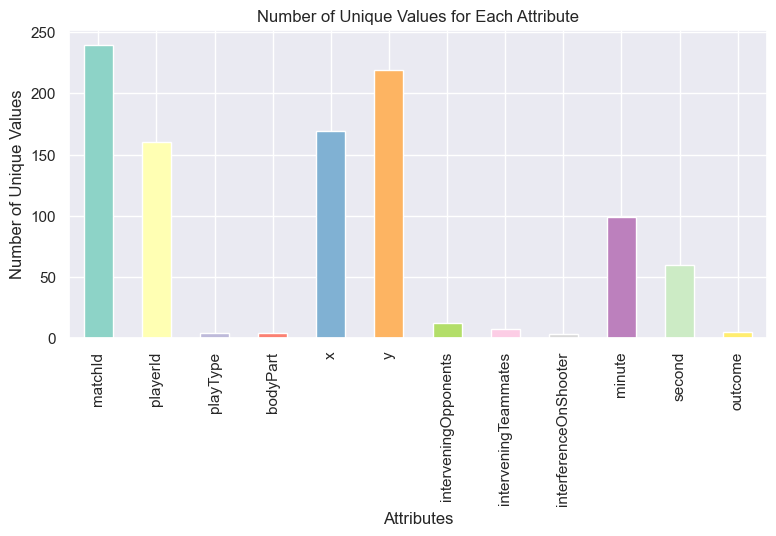

In [67]:
unique_counts = dataset.nunique()

sns.set_theme()
colors = sns.color_palette('Set3')
unique_counts.plot(kind='bar', figsize=(9, 4), color=colors)
plt.title('Number of Unique Values for Each Attribute')
plt.xlabel('Attributes')
plt.ylabel('Number of Unique Values')
plt.show()

In [68]:
print("interveningTeammates uniques:" ,dataset["interveningTeammates"].unique())
print("interveningOpponents uniques:" ,dataset["interveningOpponents"].unique())
print("bodyPart uniques:" ,dataset["bodyPart"].unique())
print("interferenceOnShooter uniques:" ,dataset["interferenceOnShooter"].unique())
print("playType uniques:" ,dataset["playType"].unique())
print("outcome uniques:" ,dataset["outcome"].unique())


interveningTeammates uniques: [0 2 1 3 4 5 7]
interveningOpponents uniques: [ 1  3  6  4  2  8  5  7  0  9 10 11]
bodyPart uniques: ['right foot' 'left foot' 'head' 'other']
interferenceOnShooter uniques: ['medium' 'low' 'high']
playType uniques: ['open play' 'free kick' 'penalty' 'olimpico']
outcome uniques: ['goal' 'saved by keeper' 'missed chance' 'blocked shot' 'hit the post']


In [69]:
print(dataset["outcome"].value_counts())

outcome
missed chance      3470
saved by keeper    2395
blocked shot       1771
goal               1081
hit the post        174
Name: count, dtype: int64


In [70]:
print(dataset["interferenceOnShooter"].value_counts())

interferenceOnShooter
medium    4186
low       3315
high      1390
Name: count, dtype: int64


In [71]:
print(dataset["bodyPart"].value_counts())

bodyPart
right foot    4440
left foot     2892
head          1508
other           51
Name: count, dtype: int64


In [72]:
print(dataset["interveningOpponents"].value_counts())

interveningOpponents
2     3146
3     2134
1     1861
4      879
5      399
6      217
7      119
0       92
8       38
9        3
10       2
11       1
Name: count, dtype: int64


In [73]:
print(dataset["x"].describe())
print("---------------------")
print(dataset["y"].describe())

count    8891.000000
mean       14.597636
std         7.834989
min         0.000000
25%         8.480000
50%        12.470000
75%        20.950000
max        70.820000
Name: x, dtype: float64
---------------------
count    8891.000000
mean        0.371103
std         9.012600
min       -33.920000
25%        -5.740000
50%         0.500000
75%         6.730000
max        33.920000
Name: y, dtype: float64


In [74]:
print(dataset[dataset["playType"] == "open play"].value_counts())

matchId  playerId  playType   bodyPart    x      y       interveningOpponents  interveningTeammates  interferenceOnShooter  minute  second  outcome        
m_1      p_102     open play  right foot  24.94  -7.23   3                     0                     low                    80      7       saved by keeper    1
m_26     p_24      open play  left foot   22.20  -9.23   3                     0                     medium                 33      5       blocked shot       1
         p_160     open play  right foot  20.95   6.98   3                     0                     low                    39      7       goal               1
         p_157     open play  head        8.73   -4.24   2                     0                     high                   58      4       missed chance      1
         p_155     open play  left foot   10.97  -5.49   2                     0                     high                   74      13      saved by keeper    1
                                       

In [75]:
dataset["goal"] = dataset["outcome"].apply(lambda x: 1 if x == 'goal' else 0).astype(bool)
dataset["on target"] = dataset["outcome"].apply(lambda x: 0 if x in ['hit the post', 'missed chance'] else 1)
dataset[dataset["on target"] == True].value_counts().sum()

5247

In [76]:
dataset.head()

,matchId,playerId,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome,goal,on target
0,m_91,p_103,open play,right foot,13.47,-11.22,1,0,medium,70,9,goal,True,1
1,m_17,p_16,open play,left foot,9.48,14.22,3,0,medium,55,4,saved by keeper,False,1
2,m_111,p_88,free kick,left foot,29.43,-1.25,6,2,low,86,31,saved by keeper,False,1
3,m_142,p_87,open play,right foot,26.93,1.00,4,1,medium,77,2,missed chance,False,0
4,m_117,p_9,open play,right foot,10.72,5.24,2,0,medium,76,46,goal,True,1


In [77]:
dataset = dataset[dataset['playType'] == 'open play']


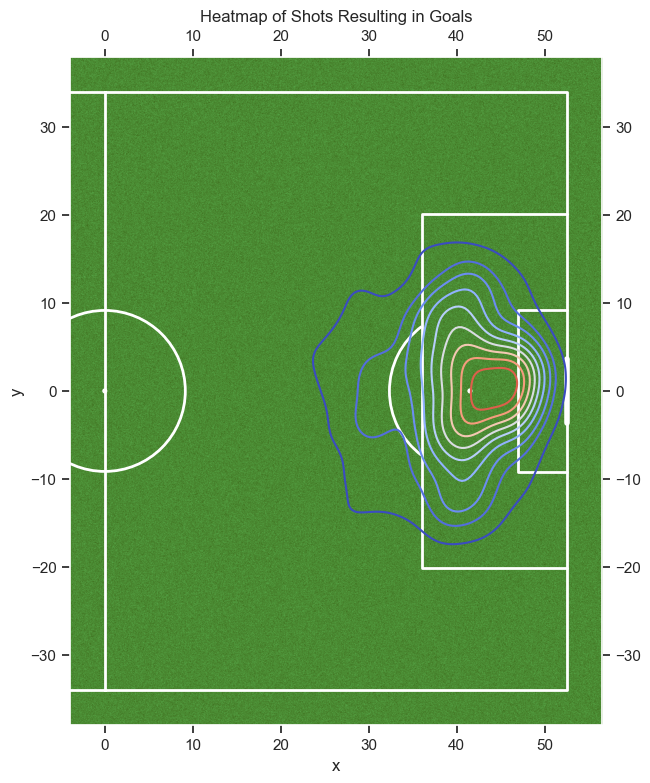

In [78]:
goal_shots = dataset[dataset['goal'] == True]

pitch = Pitch(pitch_type='skillcorner', pitch_color='grass', axis=True, label=True, tick=True, half=True, pitch_length=105, pitch_width=68)

fig, ax = pitch.draw(figsize=(12, 8))
heatmap = sns.kdeplot(x= 52.5 -2.44 - goal_shots['x'] , y= goal_shots['y'], cmap='coolwarm')

plt.title('Heatmap of Shots Resulting in Goals')
plt.show()

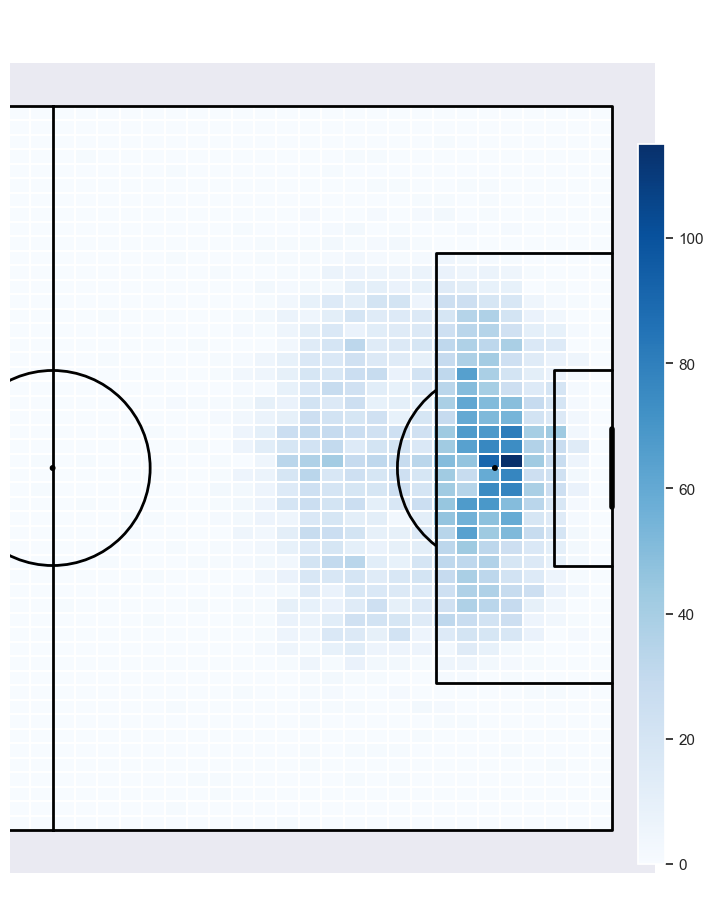

In [79]:
pitch = Pitch(line_color='black', half = True, pitch_type='skillcorner', pitch_length=105, pitch_width=68, line_zorder = 2)
fig, ax = pitch.grid(   grid_height=0.9, title_height=0.06, axis=False,
                        endnote_height=0.04, title_space=0, endnote_space=0)

bin_statistic_shots = pitch.bin_statistic(52.5 - 2.44 - dataset["x"], dataset["y"], bins=50)

pcm = pitch.heatmap(bin_statistic_shots, ax=ax["pitch"], cmap='Blues', edgecolor='white', linewidth = 0.01)

ax_cbar = fig.add_axes((0.95, 0.05, 0.04, 0.8))
cbar = plt.colorbar(pcm, cax=ax_cbar)
plt.show()


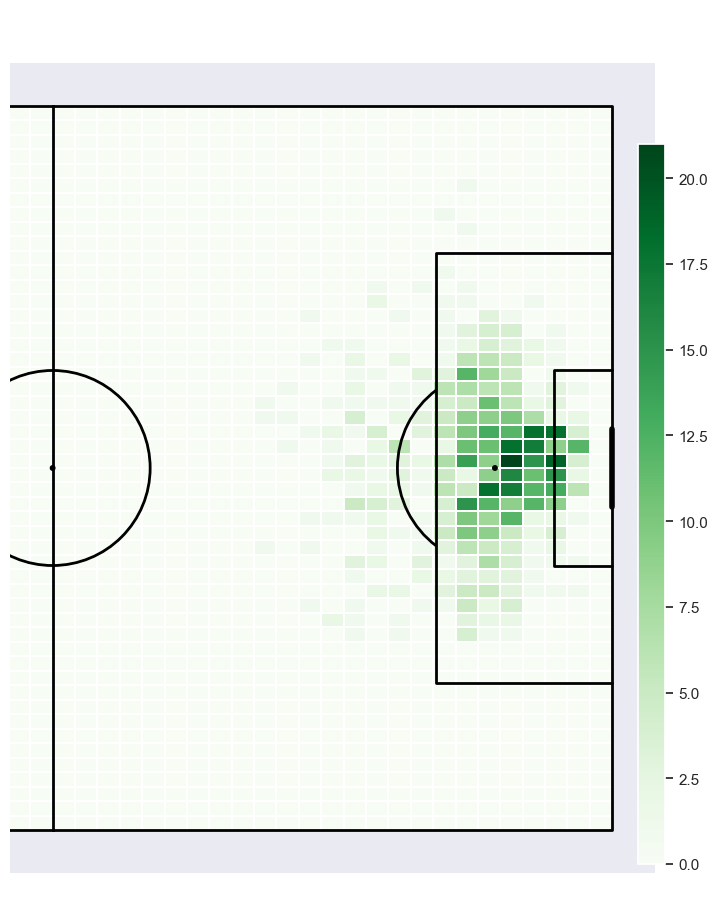

In [80]:
pitch = Pitch(line_color='black', half = True, pitch_type='skillcorner', pitch_length=105, pitch_width=68, line_zorder = 2)
fig, ax = pitch.grid(   grid_height=0.9, title_height=0.06, axis=False,
                        endnote_height=0.04, title_space=0, endnote_space=0)
goal_shots = dataset[dataset["goal"] == True]
bin_statistic_goals = pitch.bin_statistic(52.5 - 2.44 - goal_shots["x"], goal_shots["y"], bins=50)

pcm = pitch.heatmap(bin_statistic_goals, ax=ax["pitch"], cmap='Greens', edgecolor='white', linewidth = 0.01)

ax_cbar = fig.add_axes((0.95, 0.05, 0.04, 0.8))
cbar = plt.colorbar(pcm, cax=ax_cbar)
plt.show()


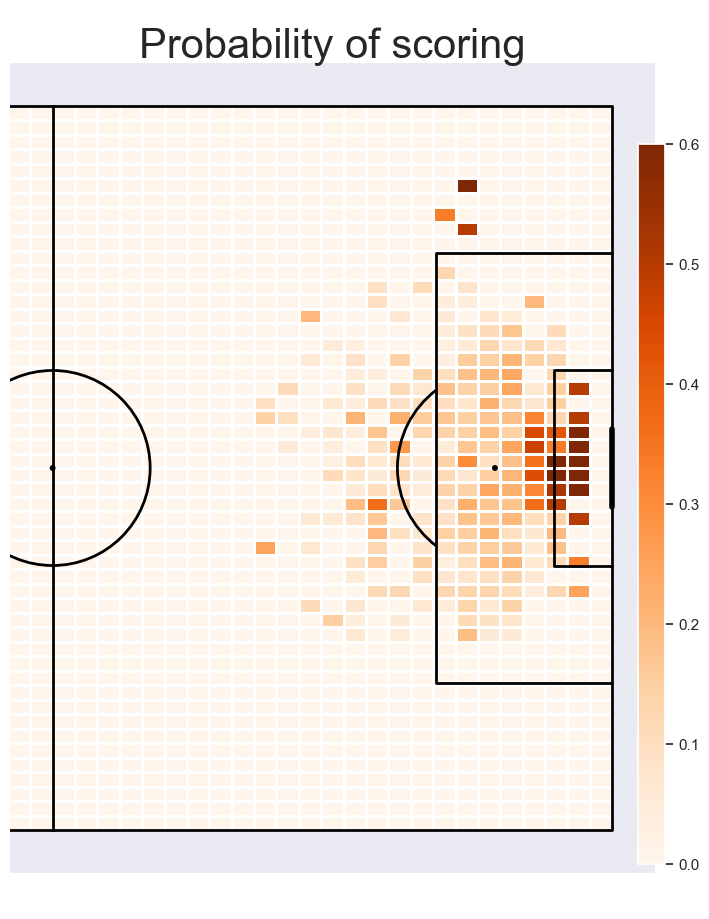

In [81]:
pitch = Pitch(line_color='black', half = True, pitch_type='skillcorner', pitch_length=105, pitch_width=68, line_zorder = 2)
fig, ax = pitch.grid(   grid_height=0.9, title_height=0.06, axis=False,
                        endnote_height=0.04, title_space=0, endnote_space=0)
bin_statistic = pitch.bin_statistic(52.5 - 2.44 - dataset["x"], dataset["y"], bins = 50)


for i in range(bin_statistic_goals["statistic"].shape[0]):
    for j in range(bin_statistic_goals["statistic"].shape[1]):
        if bin_statistic_shots["statistic"][i,j] != 0:
            bin_statistic["statistic"][i,j] = bin_statistic_goals["statistic"][i,j] / bin_statistic_shots["statistic"][i,j]
        else:
            bin_statistic["statistic"][i,j] = 0

pcm = pitch.heatmap(bin_statistic, ax=ax["pitch"], cmap='Oranges', edgecolor='white', vmin = 0, vmax = 0.6)

ax_cbar = fig.add_axes((0.95, 0.05, 0.04, 0.8))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Probability of scoring' , fontsize = 30)
plt.show()

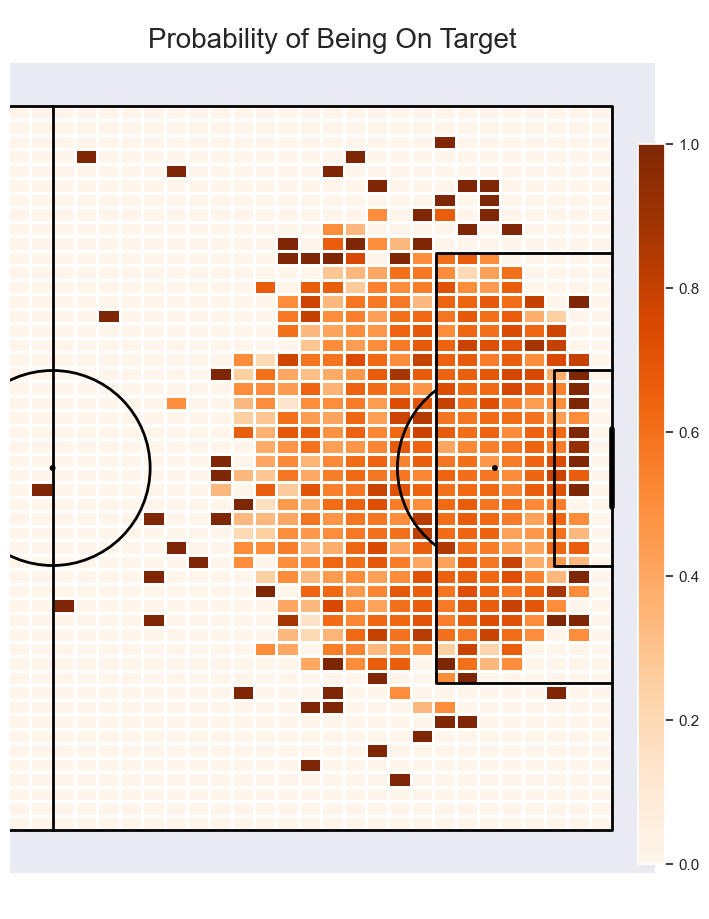

In [82]:
pitch = Pitch(line_color='black', half=True, pitch_type='skillcorner', pitch_length=105, pitch_width=68, line_zorder=2)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False, endnote_height=0.04, title_space=0, endnote_space=0)

bin_statistic_shots = pitch.bin_statistic(52.5 - 2.44 - dataset["x"], dataset["y"], bins=50)

on_target = dataset[(dataset["on target"] == True)]

bin_statistic_on_target = pitch.bin_statistic(52.5 - 2.44 - on_target["x"], on_target["y"], bins=50)

bin_statistic = bin_statistic_shots.copy() 
for i in range(bin_statistic_shots["statistic"].shape[0]):
    for j in range(bin_statistic_shots["statistic"].shape[1]):
        if bin_statistic_shots["statistic"][i, j] != 0:
            bin_statistic["statistic"][i, j] = bin_statistic_on_target["statistic"][i, j] / bin_statistic_shots["statistic"][i, j]
        else:
            bin_statistic["statistic"][i, j] = 0

pcm = pitch.heatmap(bin_statistic, ax=ax['pitch'], cmap='Oranges', edgecolor='white', vmin=0, vmax=1)

ax_cbar = fig.add_axes((0.95, 0.05, 0.04, 0.8))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Probability of Being On Target', fontsize=20)

plt.show()


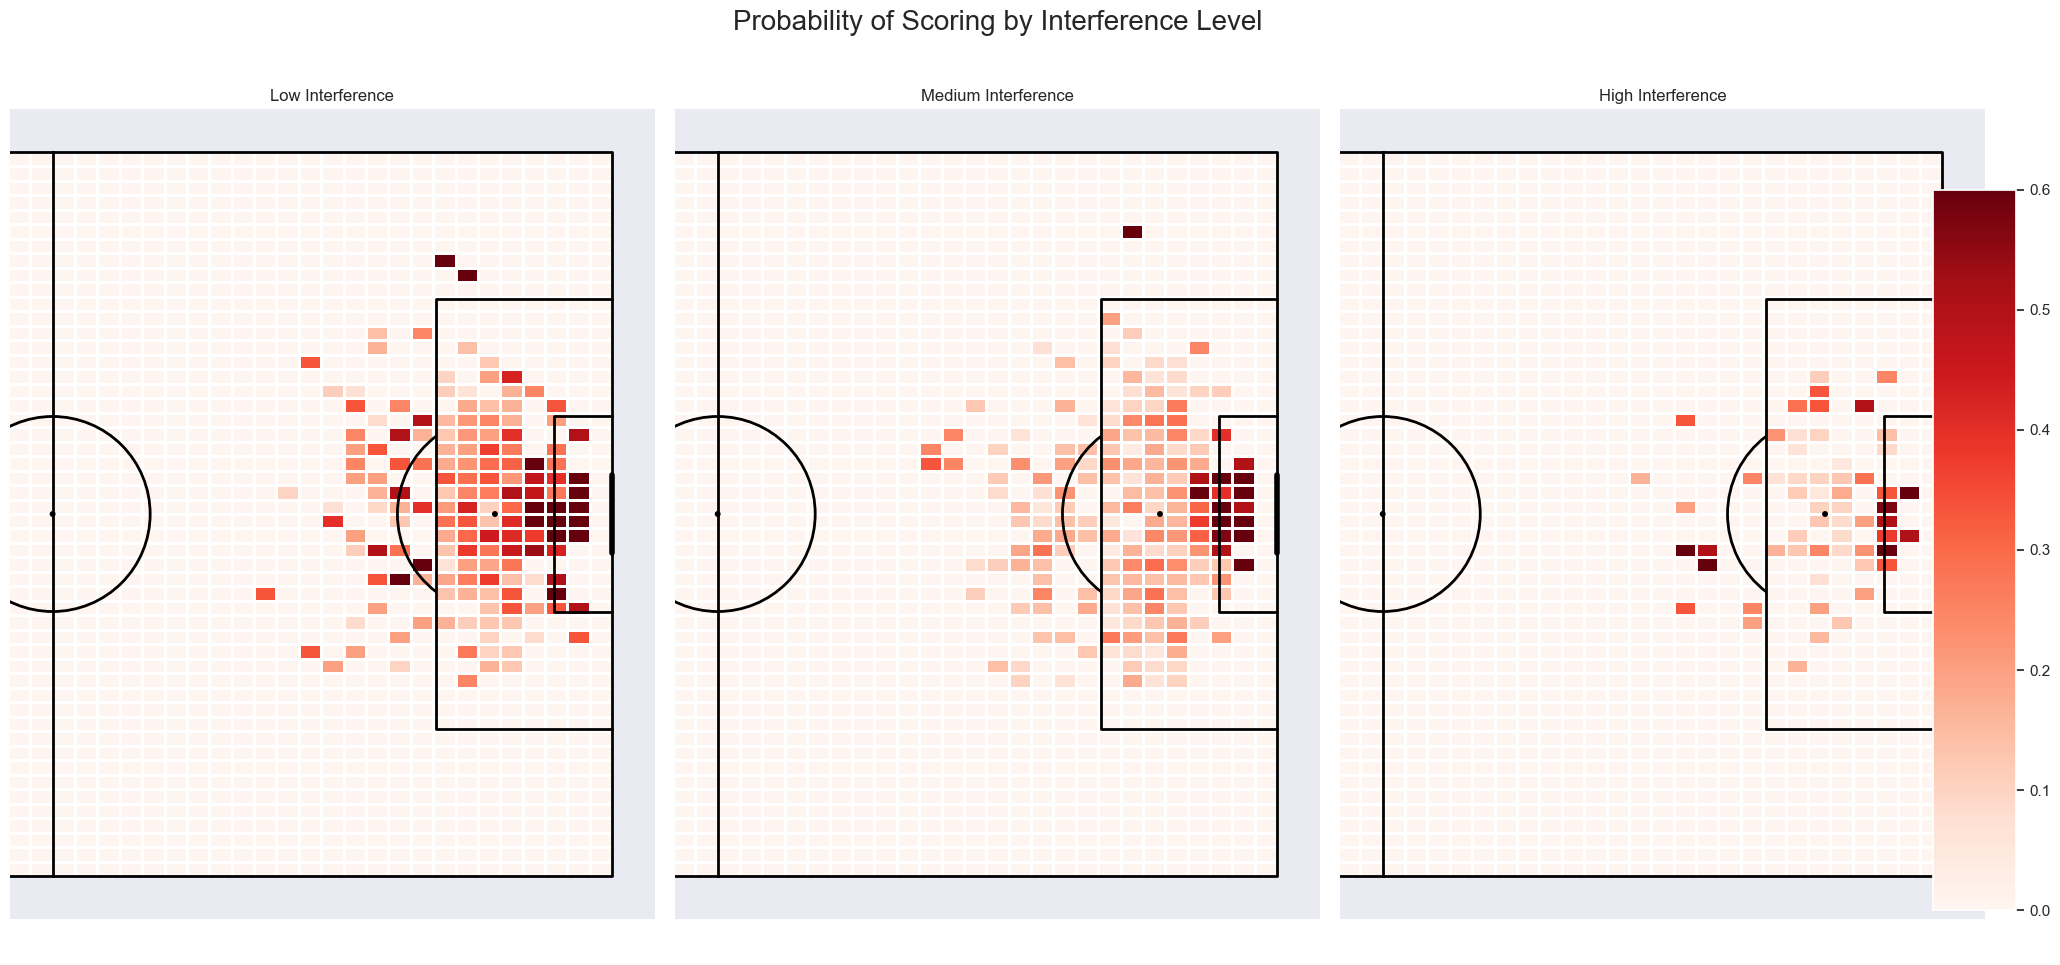

In [83]:
pitch = Pitch(line_color='black', half=True, pitch_type='skillcorner', pitch_length=105, pitch_width=68, line_zorder=2)
fig, axs = pitch.grid(  nrows=1, ncols=3, grid_height=0.9, title_height=0.06, axis=False,
                        endnote_height=0.04, title_space=0, endnote_space=0)

interference_categories = ['low', 'medium', 'high']

for index, category in enumerate(interference_categories):
    interference_data = dataset[dataset["interferenceOnShooter"] == category]
    
    bin_statistic_shots = pitch.bin_statistic(52.5 - 2.44 - interference_data["x"], interference_data["y"], bins=50)
    interference_goal = interference_data[interference_data["goal"] == True]
    bin_statistic_goals = pitch.bin_statistic(52.5 - 2.44 - interference_goal["x"], interference_goal["y"], bins=50)
    
    bin_statistic = pitch.bin_statistic(52.5 - 2.44 - interference_goal["x"], interference_goal["y"], bins=50)
    
    for i in range(bin_statistic_shots["statistic"].shape[0]):
        for j in range(bin_statistic_shots["statistic"].shape[1]):
            if bin_statistic_shots["statistic"][i, j] != 0:
                bin_statistic["statistic"][i, j] = bin_statistic_goals["statistic"][i, j] / bin_statistic_shots["statistic"][i, j]
            else:
                bin_statistic["statistic"][i, j] = 0
    
    ax = axs['pitch'][index]
    pcm = pitch.heatmap(bin_statistic, ax=ax, cmap='Reds', edgecolor='white', vmin=0, vmax=0.6)
    ax.set_title(f"{category.capitalize()} Interference")

ax_cbar = fig.add_axes((0.95, 0.05, 0.04, 0.8))
cbar = plt.colorbar(pcm, cax=ax_cbar)

fig.suptitle('Probability of Scoring by Interference Level', fontsize=20, y=1.05)

plt.show()

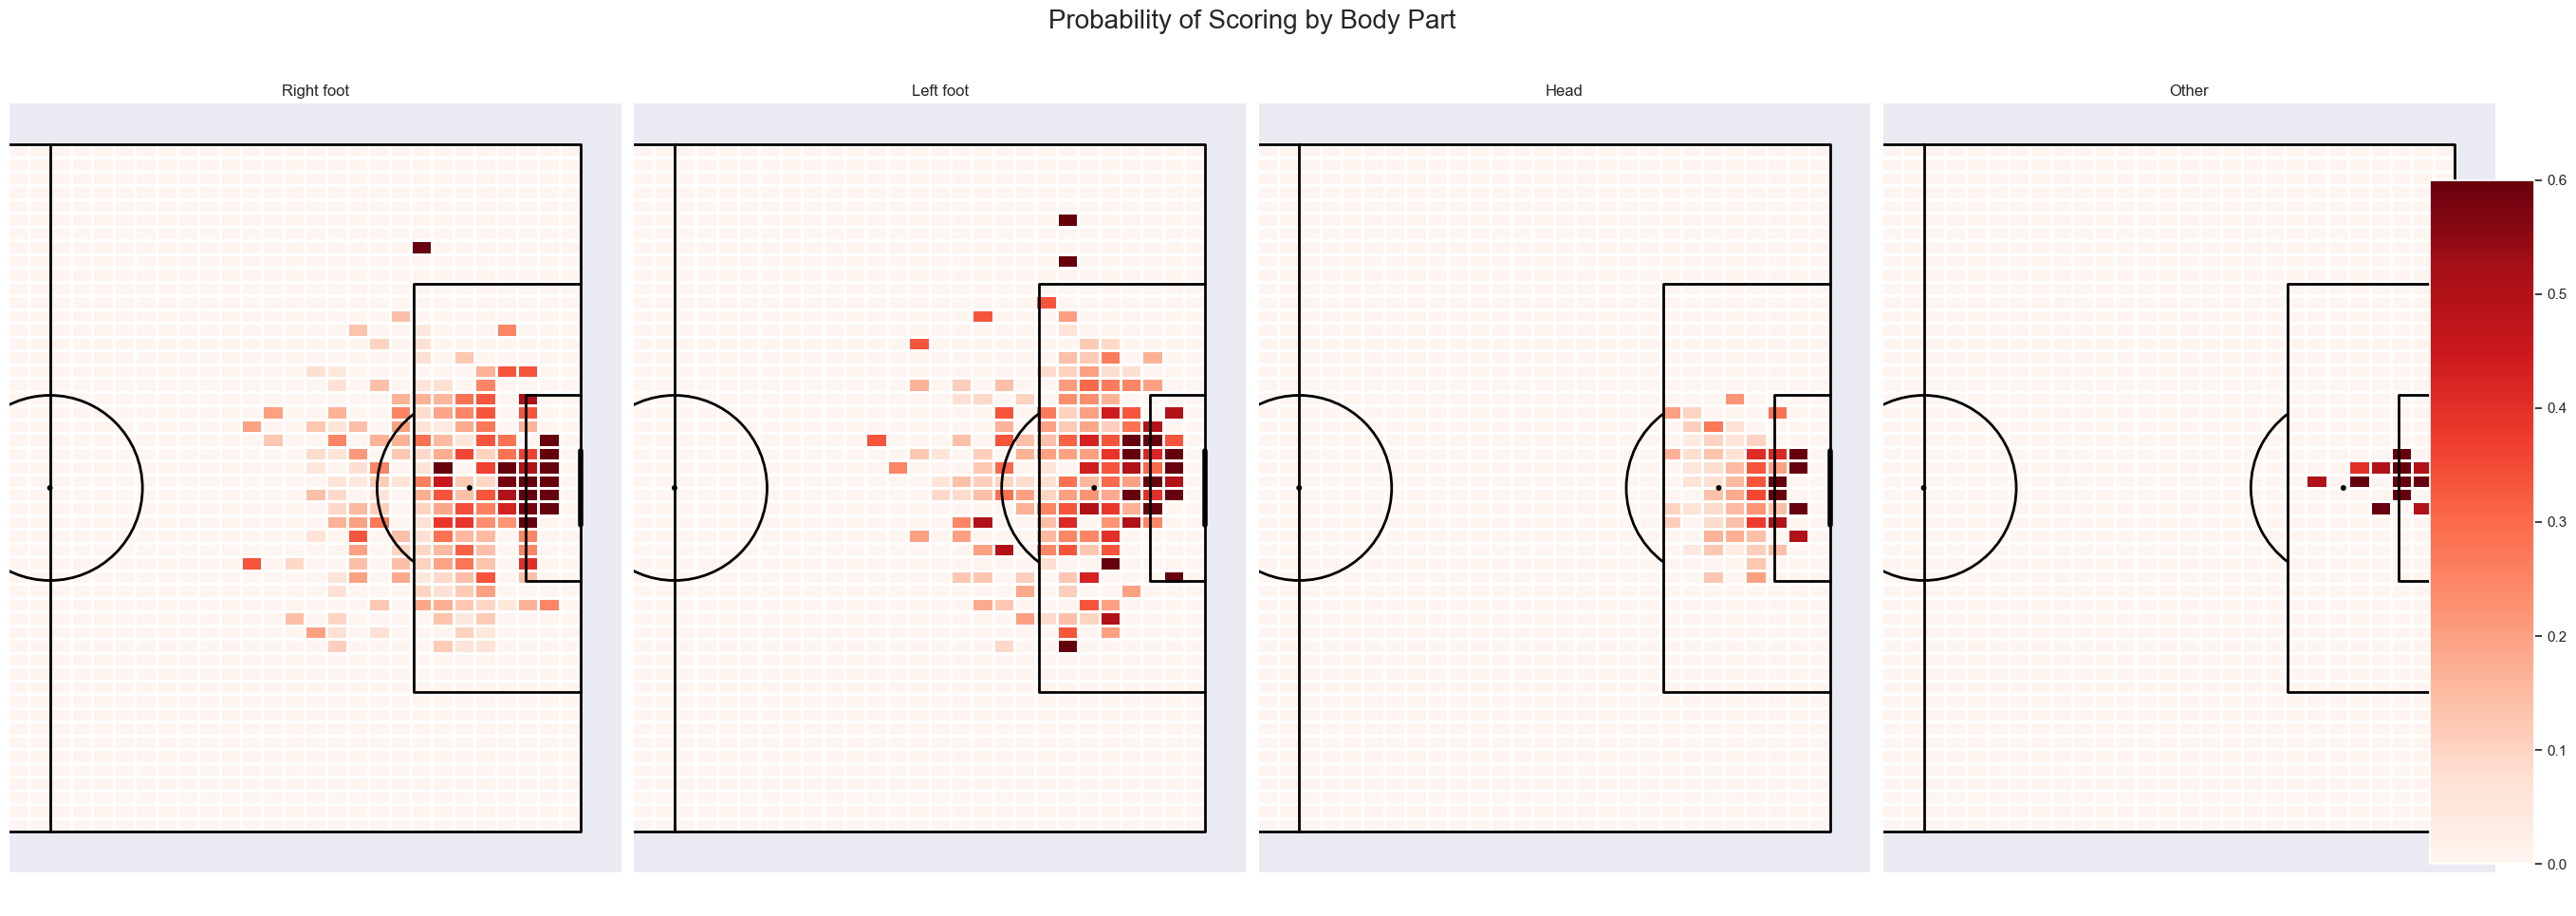

In [84]:
pitch = Pitch(line_color='black', half=True, pitch_type='skillcorner', pitch_length=105, pitch_width=68, line_zorder=2)
fig, axs = pitch.grid(  nrows=1, ncols=4, grid_height=0.9, title_height=0.06, axis=False,
                        endnote_height=0.04, title_space=0, endnote_space=0)

body_parts = ['right foot', 'left foot', 'head', 'other']

for index, part in enumerate(body_parts):
    body_data = dataset[dataset["bodyPart"] == part]
    
    bin_statistic_shots = pitch.bin_statistic(52.5 - 2.44 - body_data["x"], body_data["y"], bins=50)
    body_goal = body_data[body_data["goal"] == True]
    bin_statistic_goals = pitch.bin_statistic(52.5 - 2.44 - body_goal["x"], body_goal["y"], bins=50)
    
    bin_statistic = pitch.bin_statistic(52.5 - 2.44 - body_goal["x"], body_goal["y"], bins=50)
    
    for i in range(bin_statistic_shots["statistic"].shape[0]):
        for j in range(bin_statistic_shots["statistic"].shape[1]):
            if bin_statistic_shots["statistic"][i, j] != 0:
                bin_statistic["statistic"][i, j] = bin_statistic_goals["statistic"][i, j] / bin_statistic_shots["statistic"][i, j]
            else:
                bin_statistic["statistic"][i, j] = 0
    
    ax = axs['pitch'][index]
    pcm = pitch.heatmap(bin_statistic, ax=ax, cmap='Reds', edgecolor='white', vmin=0, vmax=0.6)
    ax.set_title(f"{part.capitalize()}")

ax_cbar = fig.add_axes((0.95, 0.05, 0.04, 0.8))
cbar = plt.colorbar(pcm, cax=ax_cbar)

fig.suptitle('Probability of Scoring by Body Part', fontsize=20, y=1.05)

plt.show()


In [85]:
dataset["angle"] = np.degrees(np.where(
    np.arctan(7.32 * dataset["x"] / (dataset["x"]**2 + dataset["y"]**2 - (7.32/2)**2)) > 0,
    np.arctan(7.32 * dataset["x"] / (dataset["x"]**2 + dataset["y"]**2 - (7.32/2)**2)),
    np.arctan(7.32 * dataset["x"] / (dataset["x"]**2 + dataset["y"]**2 - (7.32/2)**2)) + np.pi
))
print(dataset[dataset["angle"] < 90].value_counts().sum())

8251


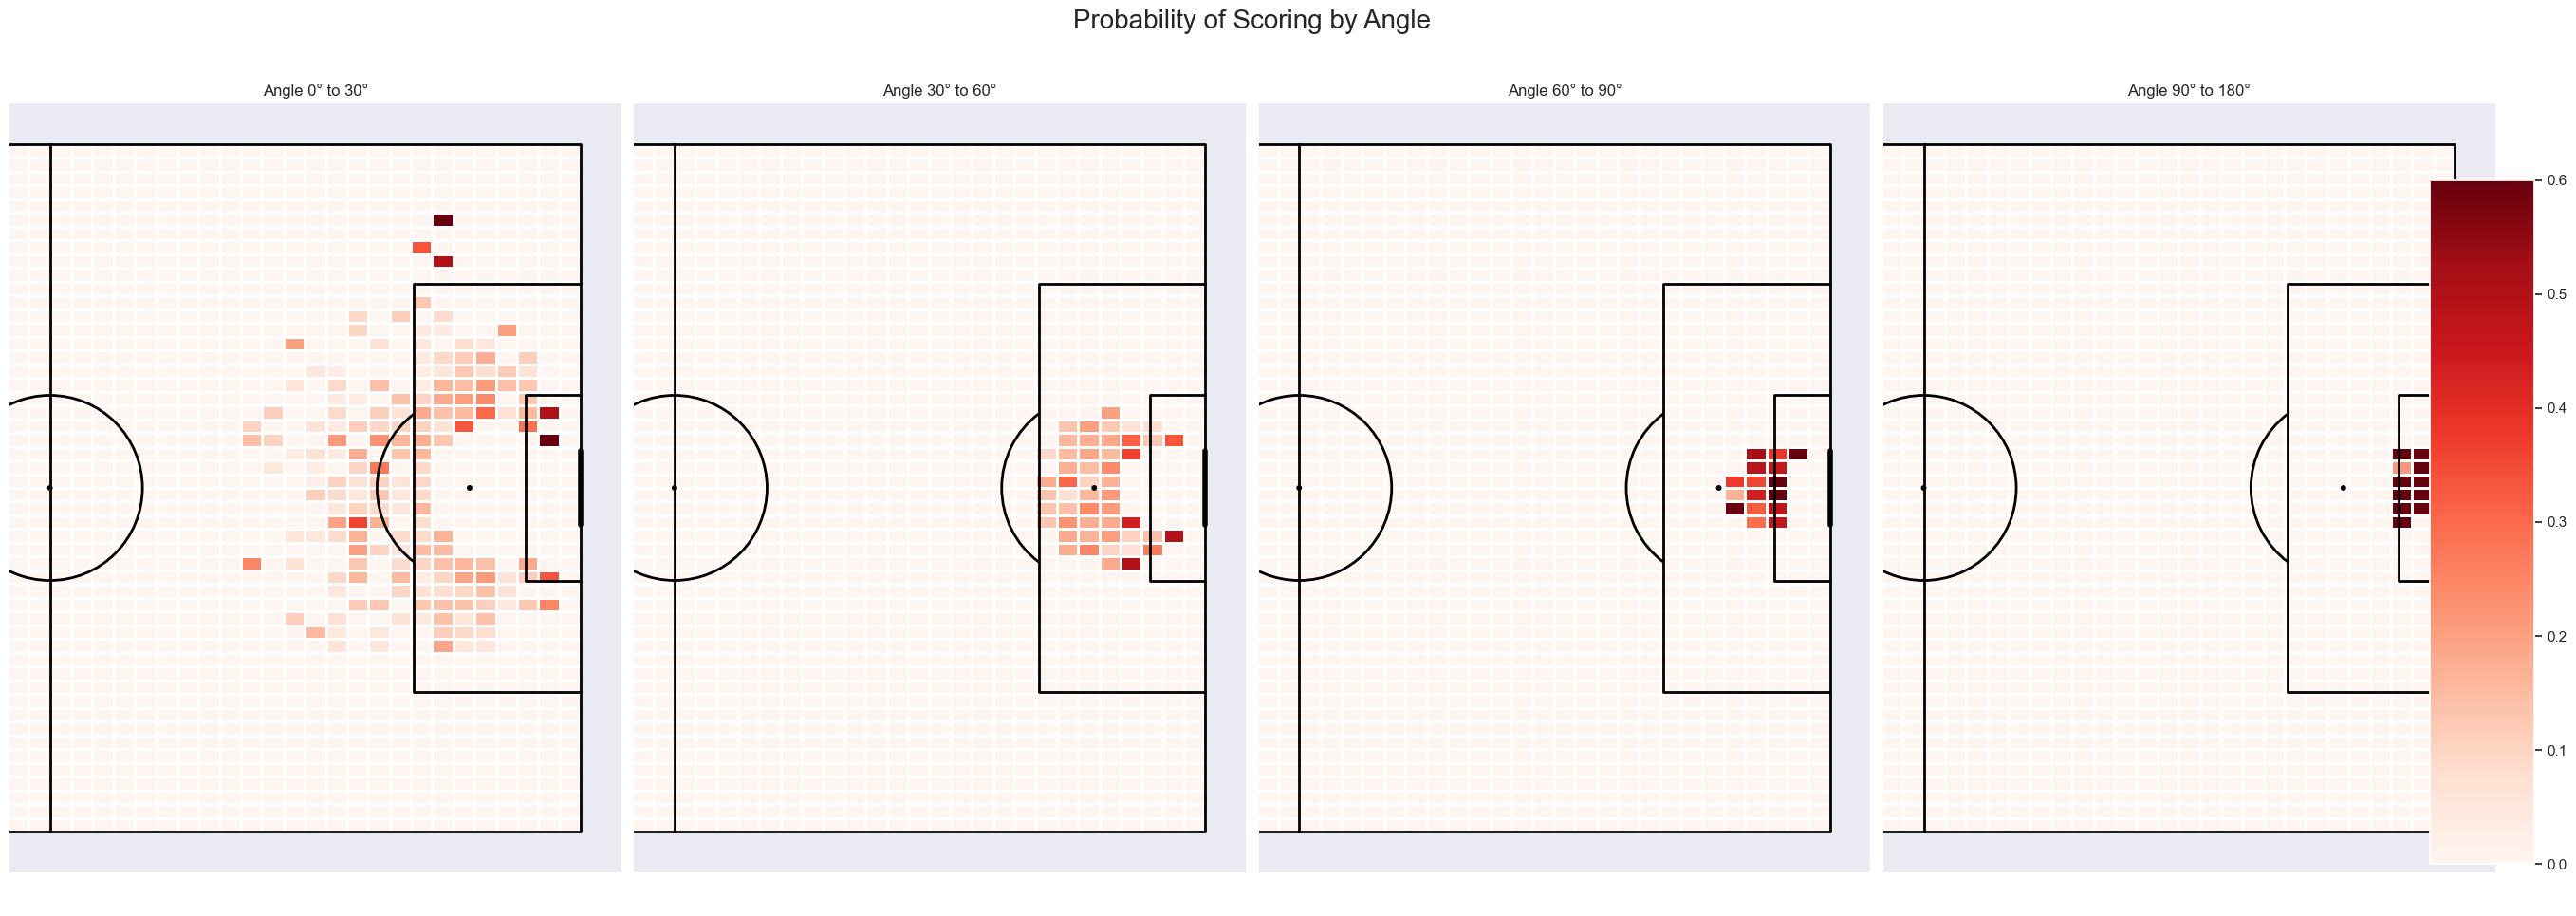

In [86]:
pitch = Pitch(line_color='black', half=True, pitch_type='skillcorner', pitch_length=105, pitch_width=68, line_zorder=2)
fig, axs = pitch.grid(  nrows=1, ncols=4, grid_height=0.9, title_height=0.06, axis=False,
                        endnote_height=0.04, title_space=0, endnote_space=0)

angle_ranges = [(0, 30), (30, 60), (60, 90), (90, 180)]

for index, (angle_min, angle_max) in enumerate(angle_ranges):
    angle_data = dataset[(dataset["angle"] >= angle_min) & (dataset["angle"] < angle_max)]
    
    bin_statistic_shots = pitch.bin_statistic(52.5 - 2.44 - angle_data["x"], angle_data["y"], bins=50)
    angle_goal = angle_data[angle_data["goal"] == True]
    bin_statistic_goals = pitch.bin_statistic(52.5 - 2.44 - angle_goal["x"], angle_goal["y"], bins=50)
    
    bin_statistic = pitch.bin_statistic(52.5 - 2.44 - angle_goal["x"], angle_goal["y"], bins=50)
    
    for i in range(bin_statistic_shots["statistic"].shape[0]):
        for j in range(bin_statistic_shots["statistic"].shape[1]):
            if bin_statistic_shots["statistic"][i, j] != 0:
                bin_statistic["statistic"][i, j] = bin_statistic_goals["statistic"][i, j] / bin_statistic_shots["statistic"][i, j]
            else:
                bin_statistic["statistic"][i, j] = 0
    
    ax = axs['pitch'][index]
    pcm = pitch.heatmap(bin_statistic, ax=ax, cmap='Reds', edgecolor='white', vmin=0, vmax=0.6)
    ax.set_title(f"Angle {angle_min}° to {angle_max}°")

ax_cbar = fig.add_axes((0.95, 0.05, 0.04, 0.8))
cbar = plt.colorbar(pcm, cax=ax_cbar)

fig.suptitle('Probability of Scoring by Angle', fontsize=20, y=1.05)

plt.show()


In [87]:
dataset.head()

,matchId,playerId,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome,goal,on target,angle
0,m_91,p_103,open play,right foot,13.47,-11.22,1,0,medium,70,9,goal,True,1,18.544088
1,m_17,p_16,open play,left foot,9.48,14.22,3,0,medium,55,4,saved by keeper,False,1,13.982592
3,m_142,p_87,open play,right foot,26.93,1.00,4,1,medium,77,2,missed chance,False,0,15.458384
4,m_117,p_9,open play,right foot,10.72,5.24,2,0,medium,76,46,goal,True,1,31.315918
5,m_147,p_118,open play,head,5.49,-1.50,1,0,low,40,15,missed chance,False,0,64.701997


In [88]:
def calculate_distance(x_values, y_values):
    distances = np.sqrt(np.power(x_values, 2) + np.power(y_values, 2))
    return distances

dataset["distance"] = calculate_distance(dataset["x"].to_numpy(), dataset["y"].to_numpy())

In [89]:
dataset.head()

,matchId,playerId,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome,goal,on target,angle,distance
0,m_91,p_103,open play,right foot,13.47,-11.22,1,0,medium,70,9,goal,True,1,18.544088,17.530810
1,m_17,p_16,open play,left foot,9.48,14.22,3,0,medium,55,4,saved by keeper,False,1,13.982592,17.090313
3,m_142,p_87,open play,right foot,26.93,1.00,4,1,medium,77,2,missed chance,False,0,15.458384,26.948560
4,m_117,p_9,open play,right foot,10.72,5.24,2,0,medium,76,46,goal,True,1,31.315918,11.932141
5,m_147,p_118,open play,head,5.49,-1.50,1,0,low,40,15,missed chance,False,0,64.701997,5.691230


In [90]:
print(dataset[(dataset["interferenceOnShooter"] == "high") & (dataset["playType"] == "open play") & (dataset["goal"] == True)].value_counts().sum())
print(dataset[(dataset["interferenceOnShooter"] == "low") & (dataset["playType"] == "open play") & (dataset["goal"] == True)].value_counts().sum())
print(dataset[(dataset["interferenceOnShooter"] == "medium") & (dataset["playType"] == "open play") & (dataset["goal"] == True)].value_counts().sum())
print("#############################################")
print("goals scored from penalties : ")
print(dataset[(dataset["playType"] == "penalty") & (dataset["goal"] == True)].value_counts().sum())
print("goals scored from open plays : ")
print(dataset[(dataset["playType"] == "open play") & (dataset["goal"] == True)].value_counts().sum())
print("goals scored from free kicks : ")
print(dataset[(dataset["playType"] == "free kick") & (dataset["goal"] == True)].value_counts().sum())
print("goals scored from corner kicks : ")
print(dataset[(dataset["playType"] == "olimpico") & (dataset["goal"] == True)].value_counts().sum())
print("#############################################")
print("goals scored from inside the box : ")
print(dataset[(dataset["goal"] == True) & (dataset["distance"] <= 18)].value_counts().sum())
print(dataset[(dataset["playType"] == "olimpico") & (dataset["goal"] == True)])
print(dataset[(dataset["interferenceOnShooter"] == "low")].value_counts().sum())

89
413
447
#############################################
goals scored from penalties : 
0
goals scored from open plays : 
949
goals scored from free kicks : 
0
goals scored from corner kicks : 
0
#############################################
goals scored from inside the box : 
824
Empty DataFrame
Columns: [matchId, playerId, playType, bodyPart, x, y, interveningOpponents, interveningTeammates, interferenceOnShooter, minute, second, outcome, goal, on target, angle, distance]
Index: []
2772


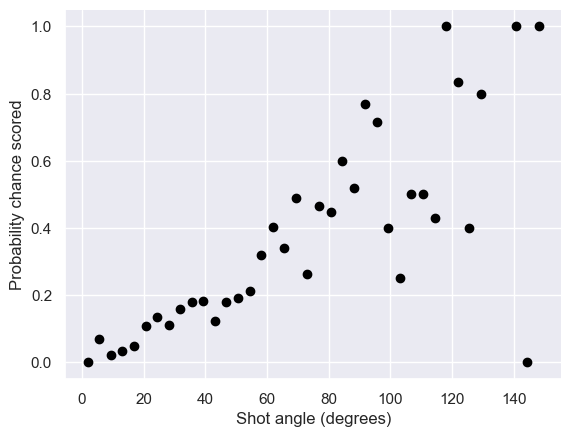

In [91]:
shotcount_dist = np.histogram(dataset["angle"], bins=40, range=[0, 150])

goal_shots = dataset[dataset['goal'] == True]
goalcount_dist = np.histogram(goal_shots["angle"], bins=40, range=[0, 150])
np.seterr(divide='ignore', invalid='ignore')

prob_goal = np.divide(goalcount_dist[0], shotcount_dist[0])
angle = shotcount_dist[1]
midangle = (angle[:-1] + angle[1:])/2

fig,ax = plt.subplots()
ax.plot(midangle, prob_goal, linestyle='none', marker= '.', markersize= 12, color='black')
ax.set_ylabel('Probability chance scored')
ax.set_xlabel("Shot angle (degrees)")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()


Log loss on test set: 0.3028825817209455


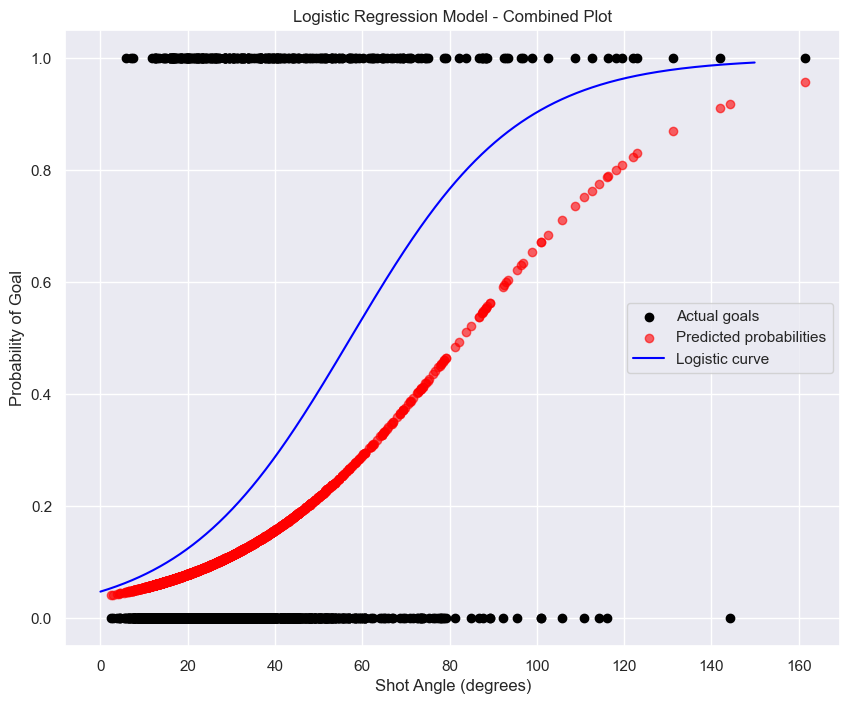

In [92]:
dataset['xG'] = np.nan 

X = dataset[['angle']]
y = dataset['goal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(solver='liblinear')
param_grid = {
    'C': np.logspace(-4, 4, 20)
}
grid = GridSearchCV(model, param_grid, cv=5, scoring='neg_log_loss')
grid.fit(X_train, y_train)

best_model = grid.best_estimator_

dataset['xG'] = best_model.predict_proba(dataset[['angle']])[:, 1] 

y_pred_proba = best_model.predict_proba(X_test)[:, 1]
test_log_loss = log_loss(y_test, y_pred_proba)
print("Log loss on test set:", test_log_loss)

plt.figure(figsize=(10, 8))
plt.scatter(X_test['angle'], y_test, color='black', label='Actual goals')
plt.scatter(X_test['angle'], y_pred_proba, color='red', label='Predicted probabilities', alpha=0.6)
b = [3, -3]
x = np.arange(150, step=0.1)
y = 1 / (1 + np.exp(b[0] + b[1] * x * np.pi / 180))
plt.plot(x, y, linestyle='solid', color='blue', label='Logistic curve')
plt.xlabel('Shot Angle (degrees)')
plt.ylabel('Probability of Goal')
plt.title('Logistic Regression Model - Combined Plot')
plt.legend()
plt.show()

                       Generalized Linear Model Regression Results                       
Dep. Variable:     ['goal[False]', 'goal[True]']   No. Observations:                 8344
Model:                                       GLM   Df Residuals:                     8342
Model Family:                           Binomial   Df Model:                            1
Link Function:                             Logit   Scale:                          1.0000
Method:                                     IRLS   Log-Likelihood:                -2631.9
Date:                           Sun, 12 May 2024   Deviance:                       5263.8
Time:                                   23:55:26   Pearson chi2:                 1.29e+04
No. Iterations:                                6   Pseudo R-squ. (CS):            0.07472
Covariance Type:                       nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------

C:\Users\HP\AppData\Local\Temp\ipykernel_24852\544879390.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xGprob=1/(1+np.exp(b[0]+b[1]*middistance))


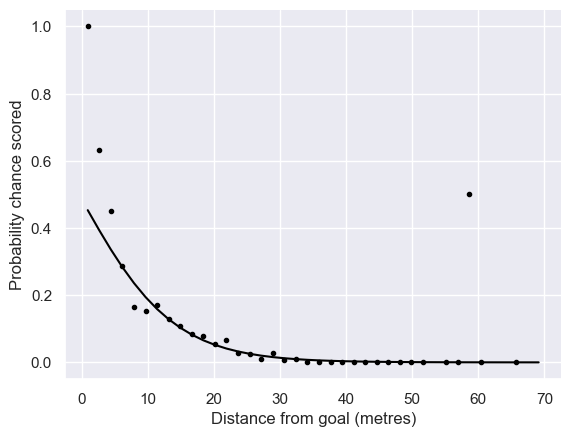

In [93]:
shotcount_dist = np.histogram(dataset['distance'],bins=40,range=[0, 70])
goal_shots = dataset[dataset['goal'] == True]
goalcount_dist = np.histogram(goal_shots['distance'],bins=40,range=[0, 70])
prob_goal = np.divide(goalcount_dist[0],shotcount_dist[0])
distance = shotcount_dist[1]
middistance= (distance[:-1] + distance[1:])/2
fig, ax = plt.subplots()
ax.plot(middistance, prob_goal, linestyle='none', marker= '.', color='black')
ax.set_ylabel('Probability chance scored')
ax.set_xlabel("Distance from goal (metres)")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


test_model = smf.glm(formula="goal ~ distance" , data=dataset,
                            family=sm.families.Binomial()).fit()
print(test_model.summary())
b=test_model.params
xGprob=1/(1+np.exp(b[0]+b[1]*middistance))
ax.plot(middistance, xGprob, linestyle='solid', color='black')
plt.show()

                       Generalized Linear Model Regression Results                       
Dep. Variable:     ['goal[False]', 'goal[True]']   No. Observations:                 8344
Model:                                       GLM   Df Residuals:                     8341
Model Family:                           Binomial   Df Model:                            2
Link Function:                             Logit   Scale:                          1.0000
Method:                                     IRLS   Log-Likelihood:                -2624.1
Date:                           Sun, 12 May 2024   Deviance:                       5248.1
Time:                                   23:55:26   Pearson chi2:                 8.23e+03
No. Iterations:                                7   Pseudo R-squ. (CS):            0.07645
Covariance Type:                       nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------

C:\Users\HP\AppData\Local\Temp\ipykernel_24852\2135466068.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xGprob=1/(1+np.exp(b[0]+b[1]*middistance+b[2]*pow(middistance,2)))


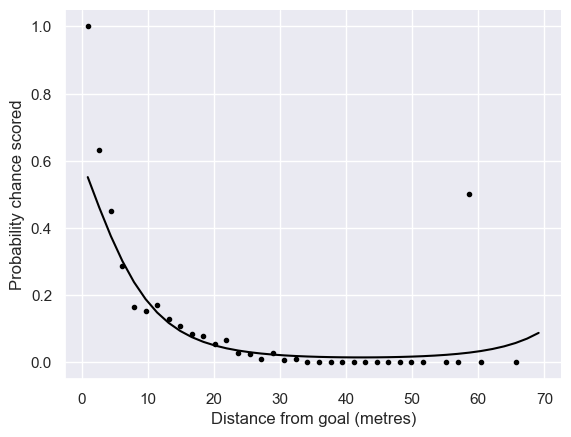

In [94]:
dataset["d2"] = dataset['distance']**2
test_model = smf.glm(   formula="goal ~ distance + d2" , data=dataset,
                            family=sm.families.Binomial()).fit()
print(test_model.summary())
b=test_model.params
xGprob=1/(1+np.exp(b[0]+b[1]*middistance+b[2]*pow(middistance,2)))
fig, ax = plt.subplots()
ax.plot(middistance, prob_goal, linestyle='none', marker= '.', color='black')
ax.set_ylabel('Probability chance scored')
ax.set_xlabel("Distance from goal (metres)")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.plot(middistance, xGprob, linestyle='solid', color='black')
plt.show()


***Q1***

There were only 34 missing values in our dataset; all of them occuring when the inferenceOnShooter value was missing and as a result, outcome column was also left empty. Due to its insignificance, we assumed the possibility of dropping these missing values as a viable option. in further examination, we noticed that the the playType column also has four values, namely open play, penalty, free kick, and olimpico. Having basic football knowledge, it is self-evident that shots scored and missed from restarting plays could be misguiding and perhaps bring us to wrong conclusions. Hence, we removed these values for a better grasp of our data. As recommended, we implemented features goal, on target, angle, distance, distance squared (d2), and xG (expected goal). 

***Q2***

There are multiple problems to use Regression in this case. First of all, a shot can be either a goal or not; so it has a binary nature while regression models are useful for continuous ***dependent*** variables. Secondly, regression models are not bounded; so their values can change from negative infinity to positive infinity. Most important of all, using regression in this case, will lead you right into the gambler's fallacy : whether a shot would result in a goal or not is not dependent on the fact that the previous attempt led to a goal or not. Also, using regression in this model can reduce your model to a single variable one, which is not quite precise for predicting the outcome of shots taken. 

***Q3***

The first (and probably the more painstaking) approach is to prove it using trigonometric identities and the geometry of the football pitch. To avoid this, we can visualize our data. it is seen in the heatmap that we provided that the angles are indeed calculated correctly. Furthermore, having the slightest experience with the game of football, one knows that it is inevitably easier to score a goal when you are facing the goal with a wider angle, which also happens to be verified by our calculations and model.